<a href="https://colab.research.google.com/github/cheikhb/ML_Projects/blob/main/Pratical_ML_with_H2O_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this project i am going to use Google Colab 


In [1]:
!pip install h2o

     |████████████████████████████████| 164.6MB 55kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=3bded496eb989ccf798e38f551cd2a212cdc0c93555735b865d5486ac027f3b3
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o


Lets import H2O and other libraries i'll use for this assignment

In [5]:
#Import H2O and other libaries that will be used in this assignment
import h2o
from h2o.estimators import *
from h2o.grid import *

import matplotlib.pyplot as plt


%matplotlib inline

In [6]:
import os
import h2o

startup  = '/home/h2o/bin/aquarium_startup'
shutdown = '/home/h2o/bin/aquarium_stop'

if os.path.exists(startup):
    os.system(startup)
    local_url = 'http://localhost:54321/h2o'
    aquarium = True
else:
    local_url = 'http://localhost:54321'
    aquarium = False

## Step 1: Init H2O and load the data

In [7]:
h2o.init(url=local_url)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj9iq49lc
  JVM stdout: /tmp/tmpj9iq49lc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj9iq49lc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_unknownUser_sm84f2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


Lets load the data i am going to use for this assignment

In [14]:
data = h2o.import_file("/content/cacao.882.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
data.head()

Maker,Origin,REF,Review Date,Cocoa Percent,Maker Location,Rating,Bean Type,Bean Origin
A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
A. Morin,Kpime,1676,2015,0.7,France,2.75,,Togo
A. Morin,Atsane,1676,2015,0.7,France,3,,Togo
A. Morin,Akata,1680,2015,0.7,France,3.5,,Togo
A. Morin,Quilla,1704,2015,0.7,France,3.5,,Peru
A. Morin,Carenero,1315,2014,0.7,France,2.75,Criollo,Venezuela
A. Morin,Cuba,1315,2014,0.7,France,3.5,,Cuba
A. Morin,Sur del Lago,1315,2014,0.7,France,3.5,Criollo,Venezuela
A. Morin,Puerto Cabello,1319,2014,0.7,France,3.75,Criollo,Venezuela
A. Morin,Pablino,1319,2014,0.7,France,4,,Peru


Lets split ou data 

In [18]:
train, valid, test = data.split_frame([0.8, 0.1], seed=69)

In [19]:
print("%d/%d/%d" % (train.nrows, valid.nrows, test.nrows))

1431/188/176


## Step 2: Set X the list of columns i am going to use to train

In [32]:
y = "Rating"

ignore = ["Rating", "REF", "Bean Type"] 

x = list(set(train.names) - set(ignore))


In [24]:
x

['Cocoa Percent', 'Maker Location', 'Maker', 'Bean Origin', 'Origin']

## Step 3:  Create a baseline deep learning model

In [25]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [34]:
data["Maker Location"] = data["Maker Location"].asfactor()
data["Maker"] = data["Maker"].asfactor()
data["Origin"] = data["Origin"].asfactor()
data["Bean Origin"] = data["Bean Origin"].asfactor()

Before starting the model training lets i need to transform categorical variables as factors

In [35]:
DL = H2ODeepLearningEstimator()

%time DL.train(x, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 312 ms, sys: 31.7 ms, total: 343 ms
Wall time: 17.4 s


The trainig model takes 17.4 seconds to finish building the model.

In [36]:
DL.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.19754499822880733
RMSE: 0.4444603449452013
MAE: 0.36530777964933897
RMSLE: 0.11023930573557199
Mean Residual Deviance: 0.19754499822880733


In [37]:
DL

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1614549484690_2


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 364,601 weights/biases, 4.2 MB, 15,171 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1620,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.237391,0.403364,0,-0.000220085,0.033513,-0.113117,0.160871
2,,3,200,Rectifier,0,0,0,0.163166,0.239382,0,-0.0135154,0.0740018,0.665912,0.249039
3,,4,1,Linear,,0,0,0.0012182,0.00140161,0,0.00119616,0.068413,-0.00254692,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.11740905133613555
RMSE: 0.3426500420781173
MAE: 0.2649680240789466
RMSLE: 0.08834394254393689
Mean Residual Deviance: 0.11740905133613555

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.18446874710442349
RMSE: 0.42949825040903655
MAE: 0.33766671551806615
RMSLE: 0.11138909395161004
Mean Residual Deviance: 0.18446874710442349

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-03-01 00:16:37,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-03-01 00:16:39,2.807 sec,687 obs/sec,0.881202,1,1261.0,0.459857,0.211468,0.362813,0.089522,0.453120,0.205318,0.357504,0.037526
2,,2021-03-01 00:16:49,12.428 sec,1068 obs/sec,7.951083,9,11378.0,0.342650,0.117409,0.264968,0.494495,0.429498,0.184469,0.337667,0.135261
3,,2021-03-01 00:16:53,16.129 sec,1122 obs/sec,10.601677,12,15171.0,0.324718,0.105442,0.257076,0.546020,0.451223,0.203603,0.353618,0.045567
4,,2021-03-01 00:16:54,17.025 sec,1118 obs/sec,10.601677,12,15171.0,0.342650,0.117409,0.264968,0.494495,0.429498,0.184469,0.337667,0.135261



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Maker.Pralus,1.000000,1.000000,0.001091
1,Maker.Pierre Marcolini,0.991348,0.991348,0.001082
2,Review Date,0.933907,0.933907,0.001019
3,Cocoa Percent,0.917962,0.917962,0.001002
4,Bean Origin.,0.917217,0.917217,0.001001
5,Maker Location.U.S.A.,0.908778,0.908778,0.000992
6,Maker.Soma,0.886770,0.886770,0.000968
7,Maker.Bonnat,0.829604,0.829604,0.000905
8,Maker Location.Italy,0.814229,0.814229,0.000889
9,Maker.Arete,0.784639,0.784639,0.000856



See the whole table with table.as_data_frame()


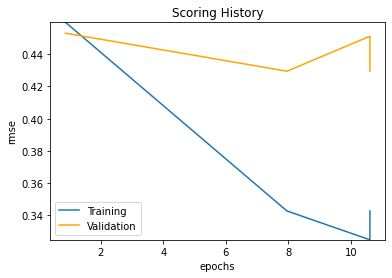

In [38]:
DL.plot()

## Step 4: Produce a tuned model

In [41]:
DL_200_epocchs = H2ODeepLearningEstimator( variable_importances=True,
                                          epochs = 200,
                                          stopping_rounds = 5,
                                          stopping_tolerance = 0.0,
                                          stopping_metric = "deviance")

%time DL_200_epocchs.train(x, y, train, validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 846 ms, sys: 62.6 ms, total: 909 ms
Wall time: 2min 34s


In [42]:
DL_200_epocchs.model_performance(valid)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.21020367870041817
RMSE: 0.45847974731760854
MAE: 0.34375217048598905
RMSLE: 0.1198140900649904
Mean Residual Deviance: 0.21020367870041817


In [44]:
DL_200_epocchs

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1614549484690_4


Status of Neuron Layers: predicting Rating, regression, gaussian distribution, Quadratic loss, 364,601 weights/biases, 4.2 MB, 230,391 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,1620,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.228836,0.400084,0,-0.000160144,0.0407486,-0.197297,0.189623
2,,3,200,Rectifier,0,0,0,0.339333,0.259231,0,-0.0157515,0.104731,0.126236,0.210265
3,,4,1,Linear,,0,0,0.0133683,0.0170733,0,-0.00581644,0.0710616,-0.00896405,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.0014449914552137051
RMSE: 0.03801304322484198
MAE: 0.0246724091048959
RMSLE: 0.009500995597048324
Mean Residual Deviance: 0.0014449914552137051

ModelMetricsRegression: deeplearning
** Reported on validation data. **

MSE: 0.21020367870041817
RMSE: 0.45847974731760854
MAE: 0.34375217048598905
RMSLE: 0.1198140900649904
Mean Residual Deviance: 0.21020367870041817

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2021-03-01 00:48:58,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-03-01 00:49:01,4.203 sec,498 obs/sec,1.0,1,1431.0,0.506675,0.256720,0.393801,-0.105306,0.489947,0.240048,0.380847,-0.125279
2,,2021-03-01 00:49:14,16.948 sec,993 obs/sec,10.0,10,14310.0,0.584638,0.341801,0.500006,-0.471626,0.629071,0.395730,0.511939,-0.855075
3,,2021-03-01 00:49:26,28.875 sec,1120 obs/sec,20.0,20,28620.0,0.422275,0.178316,0.359100,0.232261,0.554573,0.307551,0.436221,-0.441716
4,,2021-03-01 00:49:34,36.975 sec,1220 obs/sec,28.0,28,40068.0,0.208444,0.043449,0.160315,0.812930,0.485395,0.235609,0.369122,-0.104469
5,,2021-03-01 00:49:43,45.794 sec,1295 obs/sec,37.0,37,52947.0,0.151427,0.022930,0.116664,0.901275,0.479768,0.230178,0.362640,-0.079010
6,,2021-03-01 00:49:52,54.220 sec,1356 obs/sec,46.0,46,65826.0,0.122669,0.015048,0.093779,0.935212,0.470639,0.221501,0.350050,-0.038335
7,,2021-03-01 00:50:00,1 min 2.583 sec,1403 obs/sec,55.0,55,78705.0,0.136701,0.018687,0.116440,0.919542,0.461999,0.213443,0.351249,-0.000563
8,,2021-03-01 00:50:08,1 min 10.690 sec,1444 obs/sec,64.0,64,91584.0,0.071749,0.005148,0.050971,0.977836,0.466272,0.217410,0.349639,-0.019158
9,,2021-03-01 00:50:16,1 min 18.696 sec,1479 obs/sec,73.0,73,104463.0,0.065648,0.004310,0.046426,0.981445,0.461229,0.212732,0.343544,0.002769



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Maker.Soma,1.000000,1.000000,0.001979
1,Cocoa Percent,0.922984,0.922984,0.001827
2,Maker Location.U.S.A.,0.861639,0.861639,0.001705
3,Bean Origin.Ecuador,0.835520,0.835520,0.001654
4,Review Date,0.791879,0.791879,0.001567
5,Bean Origin.,0.733091,0.733091,0.001451
6,Bean Origin.Dominican Republic,0.693160,0.693160,0.001372
7,Bean Origin.Venezuela,0.664534,0.664534,0.001315
8,Origin.Chuao,0.630328,0.630328,0.001248
9,Bean Origin.Madagascar,0.623329,0.623329,0.001234



See the whole table with table.as_data_frame()


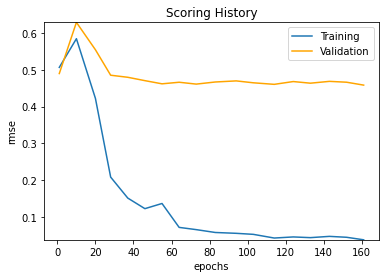

In [43]:
DL_200_epocchs.plot()

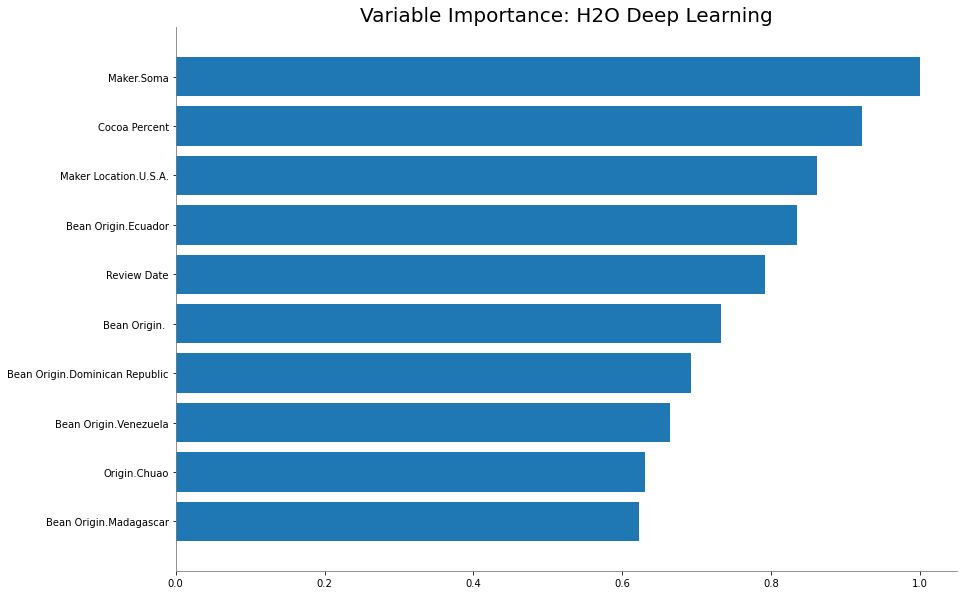

In [47]:
DL_200_epocchs.varimp_plot()


## Step 5: Saving the model and scripts

In [50]:
DL_path = h2o.save_model(model=DL_200_epocchs, path="/content/DL_model", force=True)


In [49]:
DL_path = h2o.save_model(model=DL_200_epocchs, path="C:\Users\Admin\OneDrive\Bureau\h2o_deeplearning", force=True)


SyntaxError: ignored